# Video Games Sales Prediction

![video Game image](VGSP.jpg)

## About the Dataset
This dataset contains video game sales data across different platforms, genres, and regions, making it valuable for various analytical and business use cases.
This Dataset is taken from `Kaggle`, [Video Games Dataset](https://www.kaggle.com/datasets/anandshaw2001/video-game-sales/data)
## Features:
- `Rank` - Ranking of overall sales

- `Name` - The games name

- `Platform` - Platform of the games release ( PC,PS4)

- `Year` - Year of the game's release

- `Genre` - Genre of the game

- `Publisher` - Publisher of the game

- `NA_Sales` - Sales in North America (in millions)

- `EU_Sales` - Sales in Europe (in millions)

- `JP_Sales` - Sales in Japan (in millions)

- `Other_Sales` - Sales in the rest of the world (in millions)

- `Global_Sales` - Total worldwide sales.

There are 16,598 records. 2 records were dropped due to incomplete information.

Top 5 Games by Global Sales:
- Wii Sports (Wii) – 82.74M copies
- Super Mario Bros. (NES) – 40.24M copies
- Mario Kart Wii (Wii) – 35.82M copies
- Wii Sports Resort (Wii) – 33.00M copies
- Pokémon Red/Blue (GB) – 31.37M copies

## Importing the libraries

In [41]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg') 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Load the Dataset

In [17]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [18]:
# Check for any missing values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## Data Preprocessing & Cleaning

Before diving into analysis, it is important to check the data for any inconsistencies such as missing or invalid values. While the 'Year' column may appear numeric, some entries might be missing or not properly formatted. Let's address those issues and prepare our dataset for analysis.

In [19]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Fill missing years with the median year
median_year = int(df['Year'].median())
df['Year'].fillna(median_year, inplace=True)

print('After cleaning, missing values:')
print(df.isnull().sum())

# Removing any duplicate rows as a precaution
df.drop_duplicates(inplace=True)

After cleaning, missing values:
Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64


In [ ]:
# Replace missing values in categorical feature with the mode
categorical_columns = ['Publisher']
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
# Convert the categorical features into numerical
categorical_columns = ['Name', 'Platform', 'Genre', 'Publisher']
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,11007,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,9327,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,5573,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,4,11009,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,7346,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37


## Exploratory Data Analysis
Now that the Data has been successfully preprocessed and cleaned, we can now perform some analysis

#### Distribution of Global Sales (Target feature)

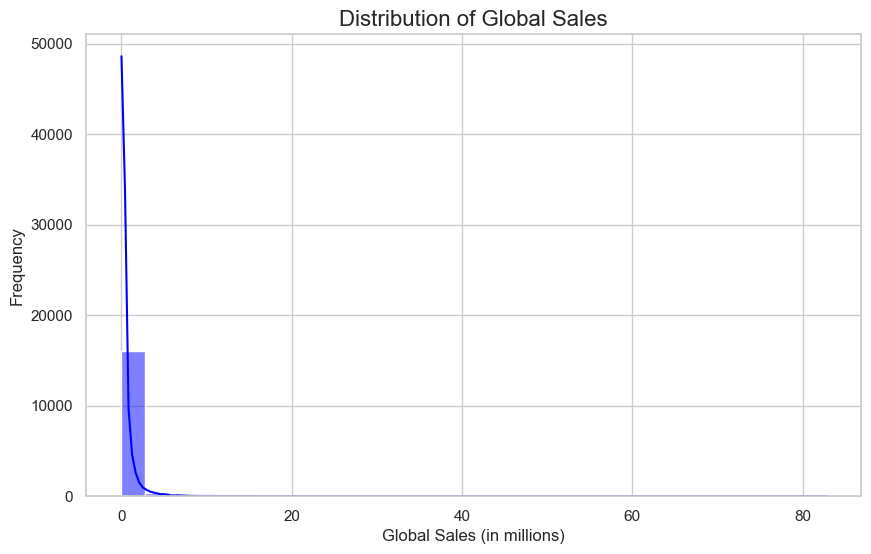

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], bins=30, kde=True, color='blue')
plt.title('Distribution of Global Sales', fontsize=16)
plt.xlabel('Global Sales (in millions)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#### Top 10 Publishers by Global Sales

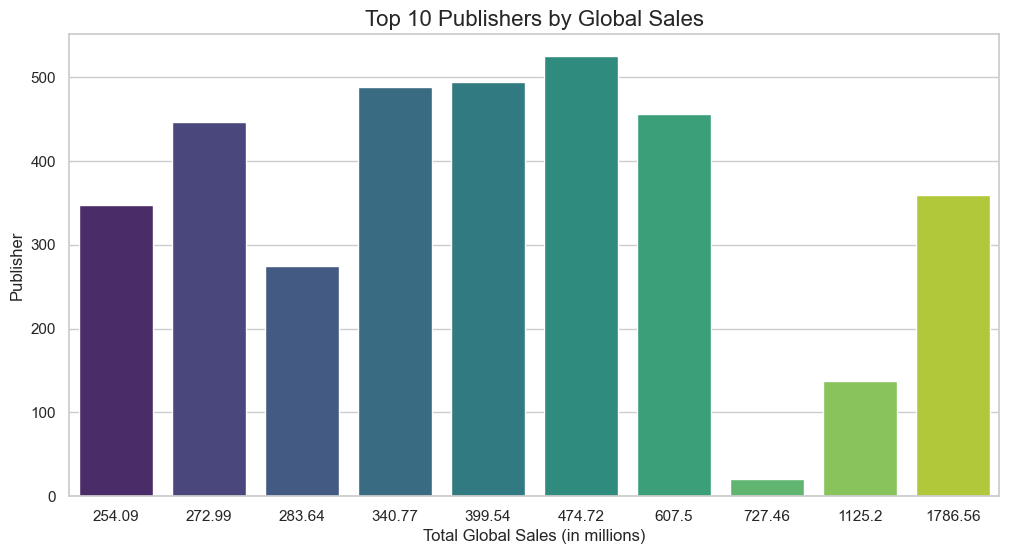

In [25]:
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Global_Sales', y='Publisher', data=top_publishers, palette='viridis')
plt.title('Top 10 Publishers by Global Sales', fontsize=16)
plt.xlabel('Total Global Sales (in millions)', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.show()

#### Sales by Genre

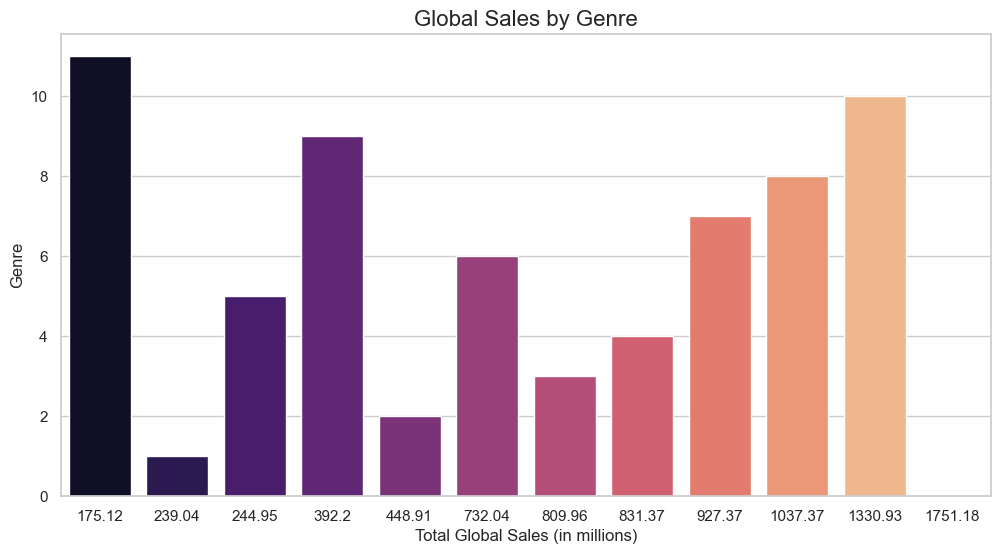

In [26]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Global_Sales', y='Genre', data=genre_sales, palette='magma')
plt.title('Global Sales by Genre', fontsize=16)
plt.xlabel('Total Global Sales (in millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

#### Platform-wise Sales 

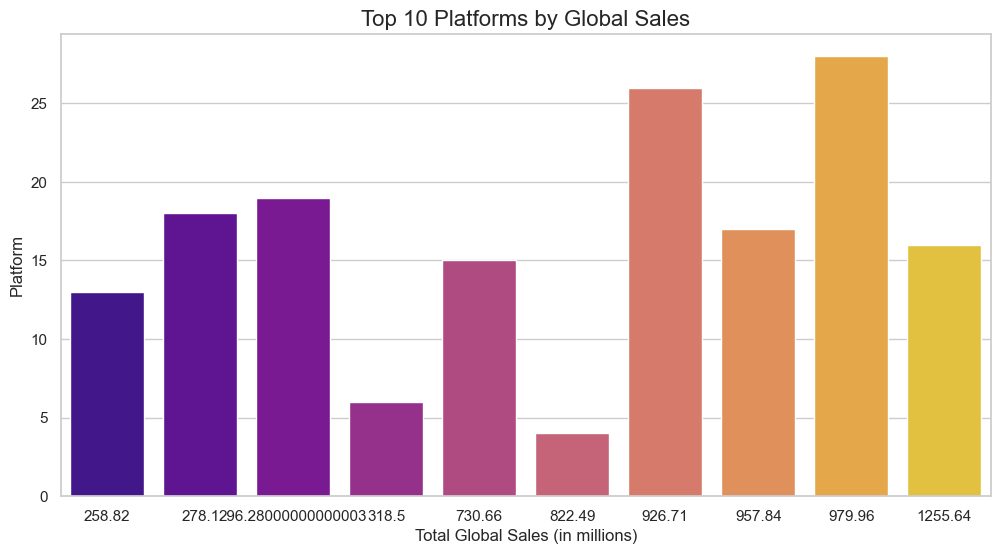

In [27]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Global_Sales', y='Platform', data=platform_sales, palette='plasma')
plt.title('Top 10 Platforms by Global Sales', fontsize=16)
plt.xlabel('Total Global Sales (in millions)', fontsize=12)
plt.ylabel('Platform', fontsize=12)
plt.show()

#### Yearly Sales Trend

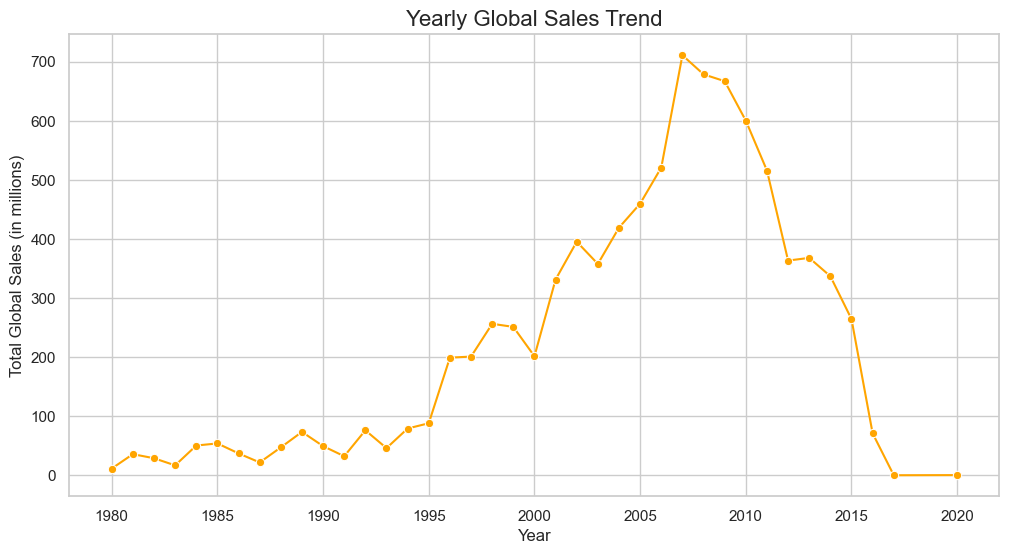

In [28]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Global_Sales', data=yearly_sales, marker='o', color='orange')
plt.title('Yearly Global Sales Trend', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Global Sales (in millions)', fontsize=12)
plt.grid(True)
plt.show()

### Visualizations Showcasing Relationships Between Features and `Global_Sales`

#### Scatter Plot: NA_Sales vs Global_Sales

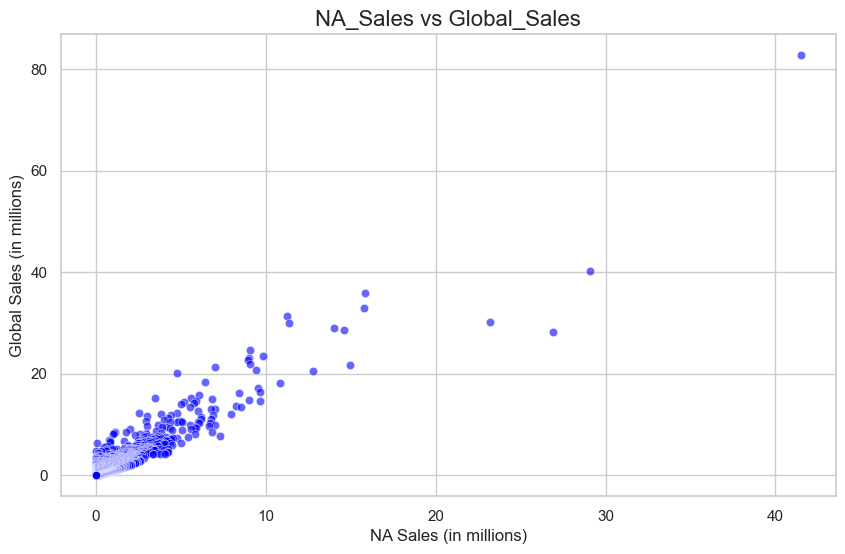

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=df, color='blue', alpha=0.6)
plt.title('NA_Sales vs Global_Sales', fontsize=16)
plt.xlabel('NA Sales (in millions)', fontsize=12)
plt.ylabel('Global Sales (in millions)', fontsize=12)
plt.show()

#### Scatter Plot: EU_Sales vs Global_Sales

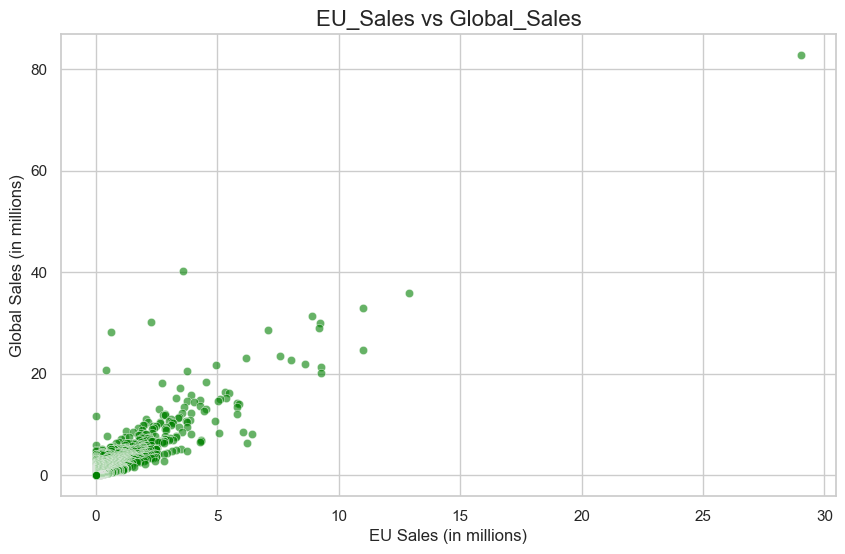

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EU_Sales', y='Global_Sales', data=df, color='green', alpha=0.6)
plt.title('EU_Sales vs Global_Sales', fontsize=16)
plt.xlabel('EU Sales (in millions)', fontsize=12)
plt.ylabel('Global Sales (in millions)', fontsize=12)
plt.show()

#### Scatter Plot: JP_Sales vs Global_Sales

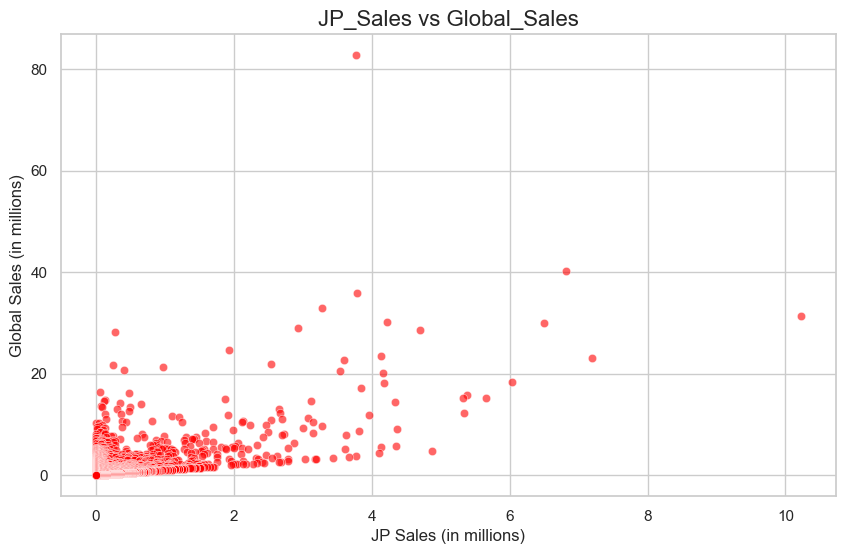

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='JP_Sales', y='Global_Sales', data=df, color='red', alpha=0.6)
plt.title('JP_Sales vs Global_Sales', fontsize=16)
plt.xlabel('JP Sales (in millions)', fontsize=12)
plt.ylabel('Global Sales (in millions)', fontsize=12)
plt.show()

### Heatmap: Correlation Between Features

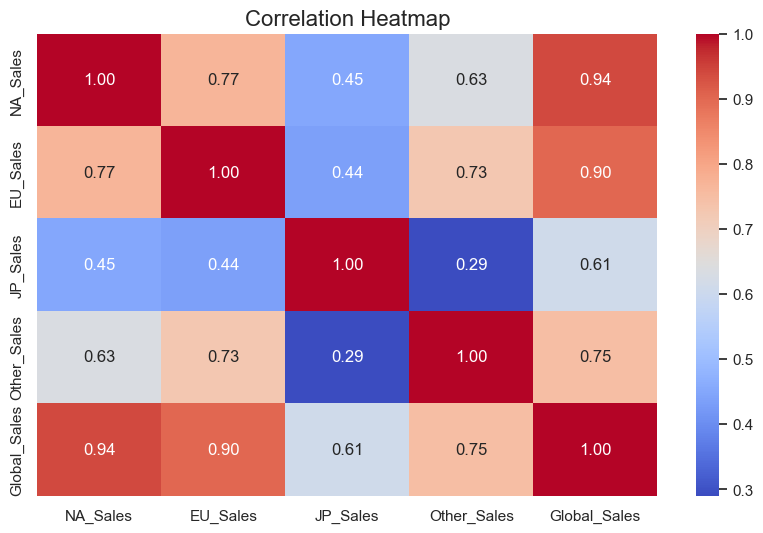

In [32]:
plt.figure(figsize=(10, 6))
corr = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

#### Pairplot: Relationships Between All Numerical Features

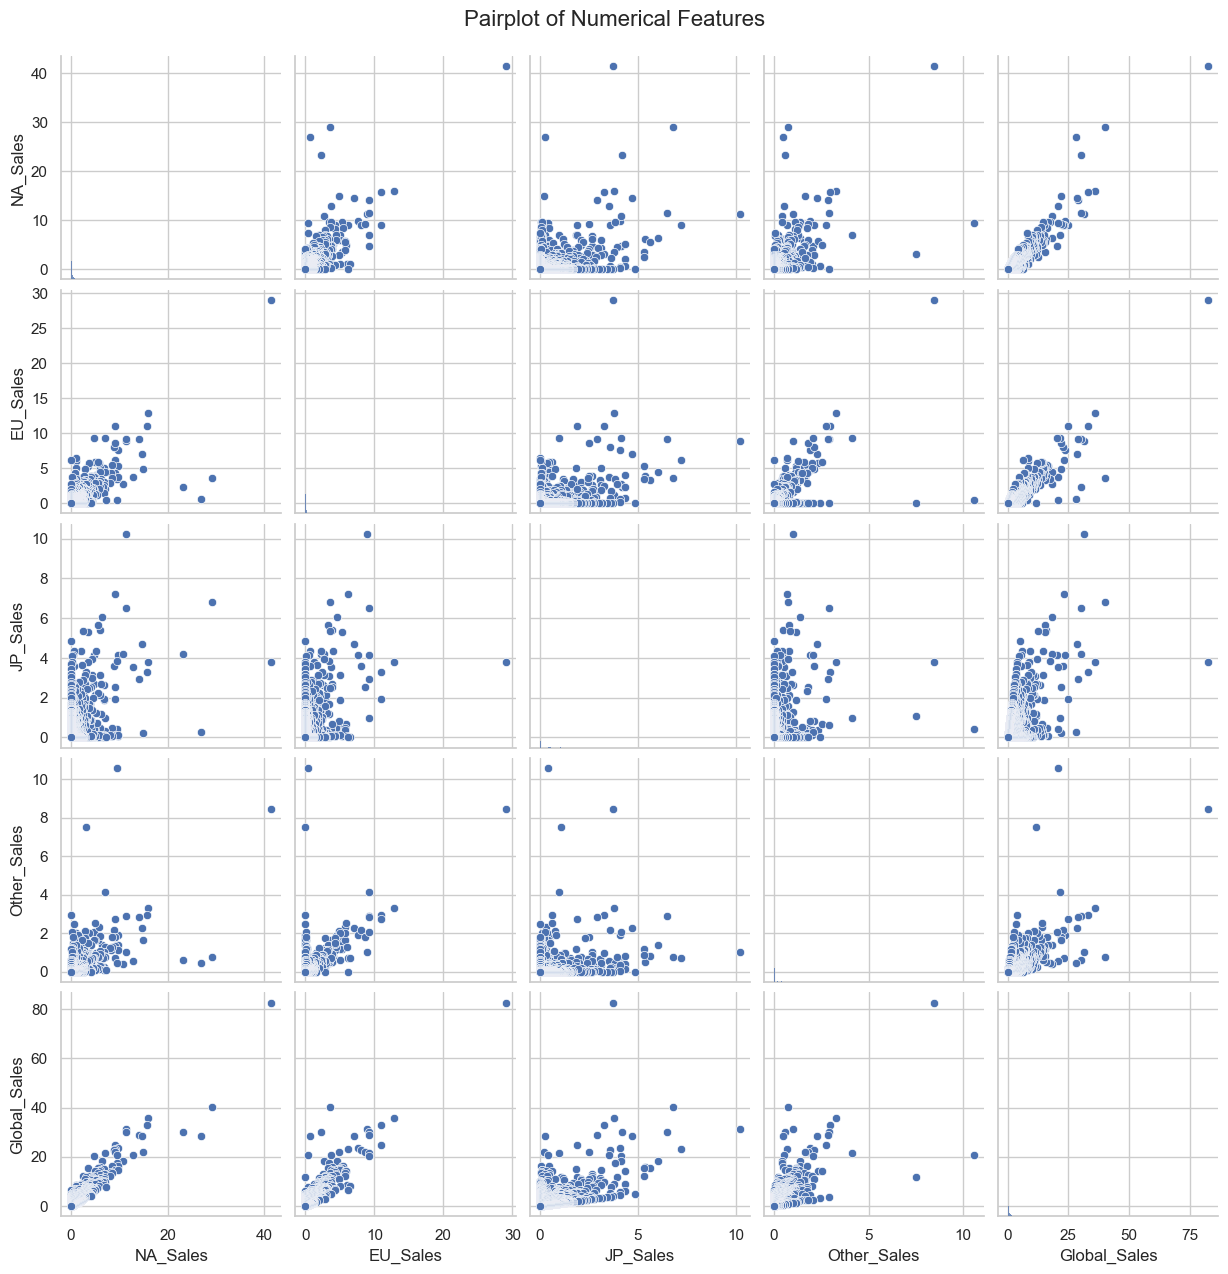

In [33]:
sns.pairplot(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
plt.suptitle('Pairplot of Numerical Features', y=1.02, fontsize=16)
plt.show()

#### Boxplot: Global Sales by Genre

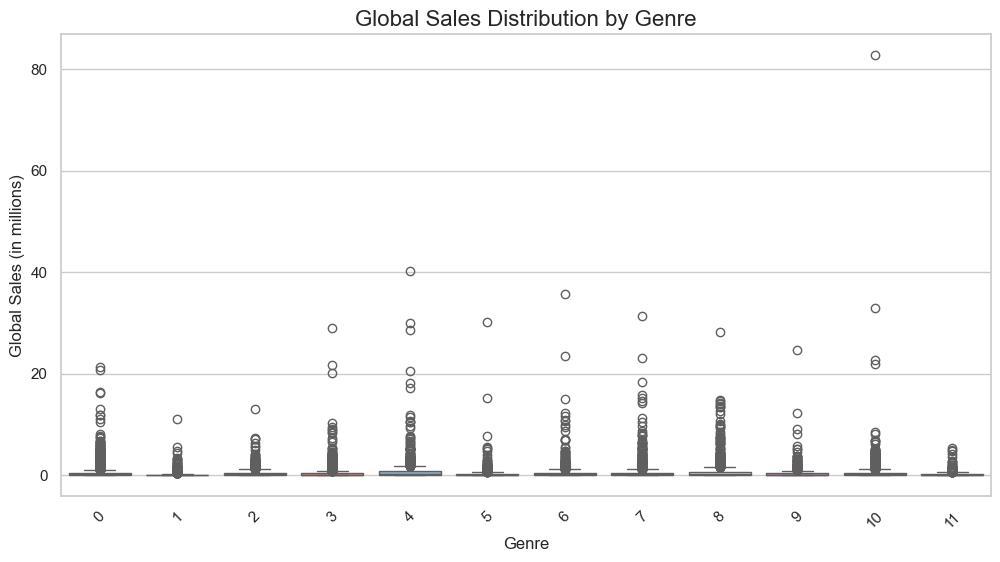

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=df, palette='Set3')
plt.title('Global Sales Distribution by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Global Sales (in millions)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Dataset Splitting, Model Training & Model Evaluation
Now we have gone through some visualizations, now its time to create the model. A function will be used to split the dataset, fit the models, make some predictions and evaluate the model performance.

In [39]:
def train_and_evaluate_regression_models(X, y):
    """
    Trains and evaluates Linear Regression and Random Forest Regressor models.
    
    Parameters:
    X (pd.DataFrame): Features (independent variables).
    y (pd.Series): Target (dependent variable).
    
    Returns:
    dict: Evaluation metrics for both models.
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize models
    linear_reg = LinearRegression()
    rf_reg = RandomForestRegressor(random_state=42)
    
    # Train models
    linear_reg.fit(X_train, y_train)
    rf_reg.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred_linear_reg = linear_reg.predict(X_test)
    y_pred_rf_reg = rf_reg.predict(X_test)
    
    # Evaluate models
    def evaluate_model(y_true, y_pred, model_name):
        mse = mean_squared_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        
        return {
            'Model': model_name,
            'MSE': mse,
            'MAE': mae,
            'R2-Score': r2
        }
    
    # Store evaluation results
    results = {
        'Linear Regression': evaluate_model(y_test, y_pred_linear_reg, 'Linear Regression'),
        'Random Forest Regressor': evaluate_model(y_test, y_pred_rf_reg, 'Random Forest Regressor')
    }
    
    return results

In [43]:
# Prepare the data
X = df.drop(columns=['Global_Sales'])  # Features
y = df['Global_Sales']  # Target (continuous)

# Train and evaluate regression models
results = train_and_evaluate_regression_models(X, y)

# Print evaluation results
for model, metrics in results.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        if isinstance(value, (int, float)):  # Check if the value is numeric
            print(f"  {metric}: {value:.4f}") 
        else:
            print(f"  {metric}: {value}")

Linear Regression:
  Model: Linear Regression
  MSE: 0.0000
  MAE: 0.0030
  R2-Score: 1.0000
Random Forest Regressor:
  Model: Random Forest Regressor
  MSE: 0.4528
  MAE: 0.0117
  R2-Score: 0.8588
